In [1]:
import tensorflow as tf

In [2]:
mnist=tf.keras.datasets.mnist

# Modified National Institute of Standards and Technology database 

# It has a collection of greyscall images with handwritten digits from 0 to 9
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\kedar\\anaconda3\\Lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

In [4]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [5]:
# x_train,x_test=x_train/255.0,x_test/255.0
#1.) Why to divide by 255
# When we are working with image data,the pixel values are integers in the range [0,255].
# So divide it by 255.0 scales these values to the range [0,1]
# Working with the smaller values increase the stability of optimization algorithm

# tf.keras.layers.Dense(128,activation='relu')
#2.)Why 128 
# It is the specific number of nuerons or units in the dense layer
# relu -->Rectified Linear Unit,It helps to add non-lib=nearity to our algorithm

In [6]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [7]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2972 - accuracy: 0.9138
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1422 - accuracy: 0.9586
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1076 - accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0884 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0758 - accuracy: 0.9753


In [8]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.9758


In [9]:
print(test_loss)
print(test_accuracy)

0.07853925228118896
0.9757999777793884


In [10]:
# Project:1
# convert image to greyscall CNN
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#load the rgb image
image_path=r"C:\Users\kedar\Downloads\mahirat.jpeg"
original_image=load_img(image_path,target_size=(224,224))
original_array=img_to_array(original_image)
original_array=original_array/255.0
print(original_array)

[[[0.8156863  0.9019608  0.89411765]
  [0.83137256 0.9098039  0.8039216 ]
  [0.8627451  0.92941177 0.7529412 ]
  ...
  [0.4117647  0.43529412 0.5372549 ]
  [0.4117647  0.40392157 0.49019608]
  [0.40784314 0.36078432 0.41568628]]

 [[0.80784315 0.8862745  0.8901961 ]
  [0.8235294  0.89411765 0.8       ]
  [0.8509804  0.91764706 0.7411765 ]
  ...
  [0.3882353  0.40392157 0.5019608 ]
  [0.39215687 0.38039216 0.4627451 ]
  [0.3764706  0.32941177 0.3764706 ]]

 [[0.80784315 0.8666667  0.8862745 ]
  [0.81960785 0.87058824 0.7921569 ]
  [0.84313726 0.89411765 0.7254902 ]
  ...
  [0.37254903 0.37254903 0.46666667]
  [0.36862746 0.34901962 0.42745098]
  [0.34509805 0.29411766 0.33333334]]

 ...

 [[0.78431374 0.7921569  0.78039217]
  [0.78039217 0.7882353  0.7764706 ]
  [0.78431374 0.7921569  0.78039217]
  ...
  [0.40784314 0.5568628  0.60784316]
  [0.43137255 0.58431375 0.6509804 ]
  [0.49411765 0.65882355 0.74509805]]

 [[0.8        0.80784315 0.79607844]
  [0.7882353  0.79607844 0.78431374]


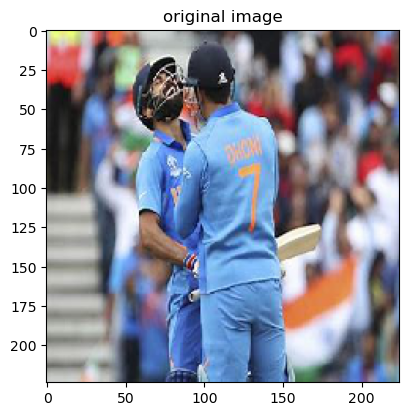

In [17]:
plt.figure(figsize=(10,300))
plt.subplot(1,2,1)
plt.title("original image")
plt.imshow(original_array)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 1)       28        
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 111, 111, 1)       0         
 g2D)                                                            
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 30ms/step


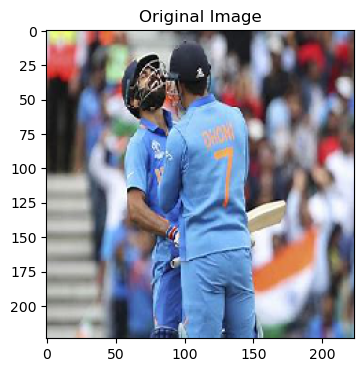

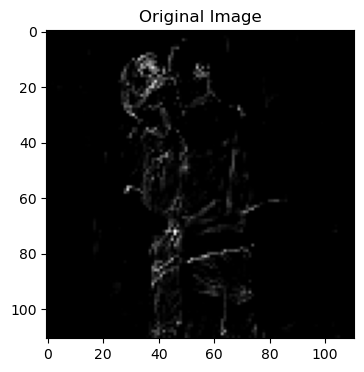

In [23]:
# Convert image to grey scale
model=models.Sequential()

# Sequentials() -->It allows us too create a linear stack of layers in a neural network
# You can add one layer at neural network at a time and each layer has connection only to the previous and next layer

model.add(layers.Conv2D(1,(3,3),activation='relu',input_shape=(224,224,3)))

# conv2D -->It represent 2D conventional Layer 

#Conventiional Layer -->>used to perform element wise multiplication or addition or division etc...

# layers.Conv2D(1) -->>1 is used to mention the number of filters in the conventional layer 
#(3,3) -->>set the size of filter

#(224,224,3) -->>224*224 -->>pixels with 3 color channel (RGB)

model.add(layers.MaxPooling2D((2,2)))

#MaxPooling2D() -->. it is used to set the dimensions of input data and extract important  features from Conv2D layer

model.summary()

# TO reshape the image 
input_image=np.expand_dims(original_array,axis=0)
greyscale=model.predict(input_image)

plt.figure(figsize=(100,4))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(original_array)

plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
plt.title("Original Image")
plt.imshow(np.squeeze(greyscale),cmap='gray')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# Model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# preprocess
from keras.preprocessing.image import ImageDataGenerator

from keras import Sequential
from keras import backend as K
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization

import tensorflow as tf
import random as rn
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [2]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISEY_DIR=r"C:\Users\kedar\Downloads\train-20240219T160308Z-001\train\daisy"
FLOWER_SUNFLOWER_DIR=r"C:\Users\kedar\Downloads\train-20240219T160308Z-001\train\sunflower"
FLOWER_TULIP_DIR=r"C:\Users\kedar\Downloads\train-20240219T160308Z-001\train\tulip"
FLOWER_DANDI_DIR=r"C:\Users\kedar\Downloads\train-20240219T160308Z-001\train\dandelion"
FLOWER_ROSE=r"C:\Users\kedar\Downloads\train-20240219T160308Z-001\train\rose"

In [3]:
def assign_label(img,flower_type):
    return flower_type

In [8]:
#tqdm -->>It creates a progress bar from the loop 

def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path=os.path.join(DIR,img)
        img=cv2.imread(path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [10]:
make_train_data('Daisy',FLOWER_DAISEY_DIR)
print(len(X))

100%|██████████| 66/66 [00:00<00:00, 469.09it/s]

132


In [11]:
make_train_data('Daisy',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 495/495 [00:03<00:00, 148.49it/s]

627


In [13]:
make_train_data('Daisy',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 610/610 [00:01<00:00, 549.06it/s]

1847


In [14]:
make_train_data('Daisy',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 656/656 [00:04<00:00, 146.25it/s]

2503


In [15]:
make_train_data('Daisy',FLOWER_ROSE)
print(len(X))

100%|██████████| 497/497 [00:03<00:00, 145.58it/s]

3000


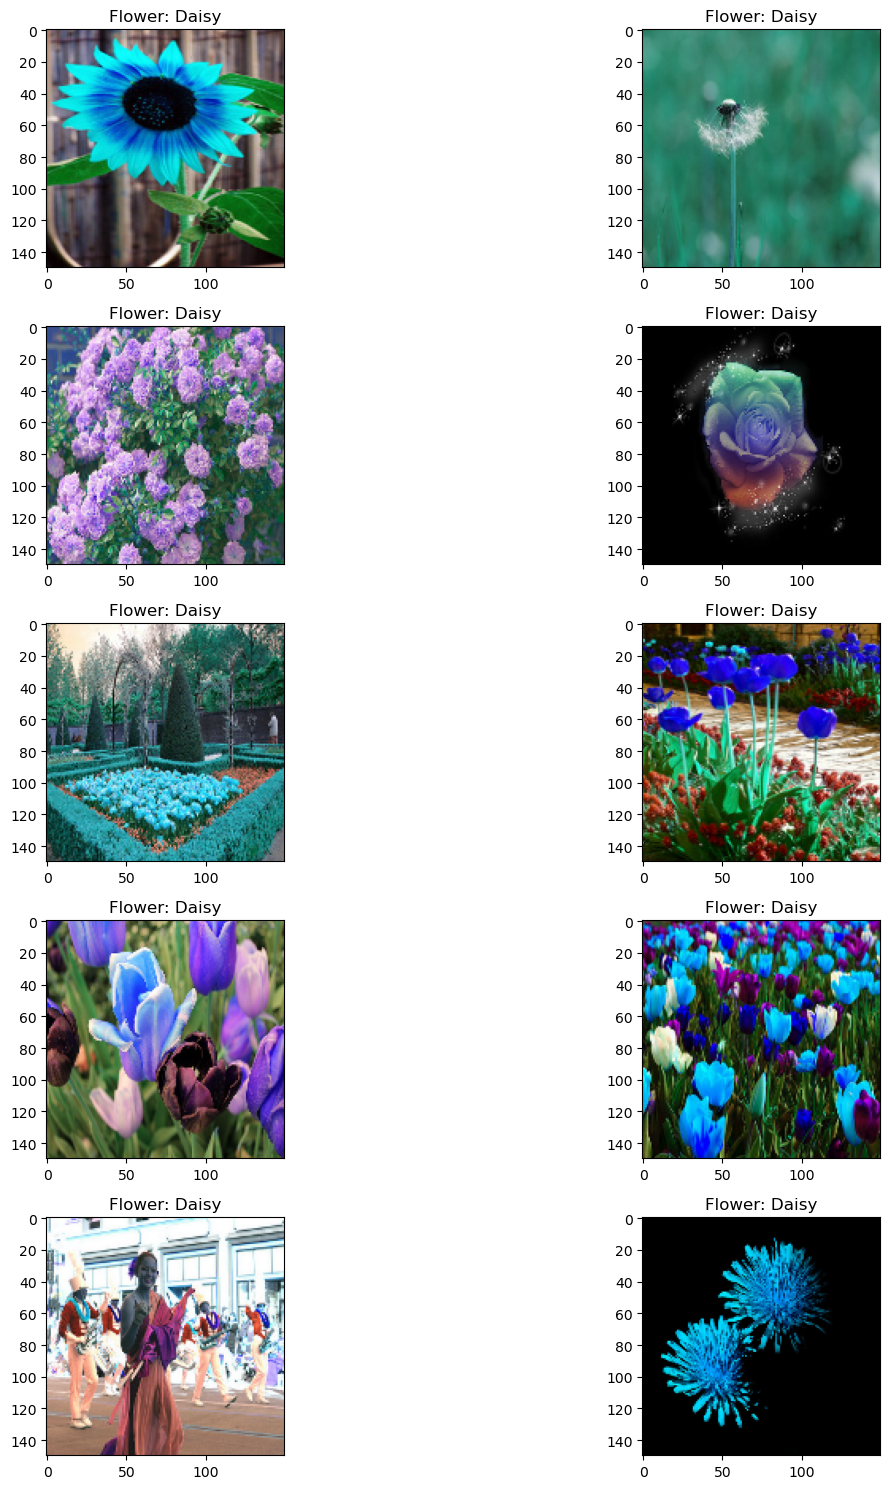

In [19]:
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)

for row in range(5):
    for col in range(2):
        l= rn.randint(0, len(Z))
        ax[row, col].imshow(X[l])
        ax[row, col].set_title("Flower: "+Z[l])

plt.tight_layout()